In [24]:
# 기본 설정


from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from matplotlib import pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd
import json


# confusion_matrix
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    # 사이즈 변경: figsize = (x, y) -> x, y로 사이즈를 변경해 주세요
    fig, ax = plt.subplots(figsize=(30, 30)) 
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.show()


# 설정에 따라 수정이 필요합니다
# path -> 분석하고 싶은 inference_file을 설정해 주세요
# ex) log/{inference_file}/ ... 
# ex) prediction/{inference_file}/ ...
path = '2023-05-13-22:40:34' # 이 부분만 변경하시면 됩니다.

with open(f'/opt/ml/level2_klue-nlp-01/code/logs/{path}/best_model/config.json', 'r') as f:
    model_info = json.load(f)
tokenizer = AutoTokenizer.from_pretrained(model_info['_name_or_path'])

no_preprocess_train_path = f'/opt/ml/level2_klue-nlp-01/code/logs/{path}/split_data/split_nopreprocess_train.csv'
preprocess_train_path = f'/opt/ml/level2_klue-nlp-01/code/logs/{path}/split_data/split_preprocess_train.csv'
val_inference_path = f'/opt/ml/level2_klue-nlp-01/code/prediction/{path}/val_inference.csv'
no_preprocess_val_path = f'/opt/ml/level2_klue-nlp-01/code/logs/{path}/split_data/split_nopreprocess_val.csv'
preprocess_val_path = f'/opt/ml/level2_klue-nlp-01/code/logs/{path}/split_data/split_preprocess_val.csv'

no_preprocess_train_df = pd.read_csv(no_preprocess_train_path)
preprocess_train_df = pd.read_csv(preprocess_train_path)
val_inference_df = pd.read_csv(val_inference_path)
no_preprocess_val_df = pd.read_csv(no_preprocess_val_path)
preprocess_val_df = pd.read_csv(preprocess_val_path)

# 틀린 데이터 추출
wrong_df = val_inference_df[val_inference_df['label'] != val_inference_df['pred_label']]
print(val_inference_df.columns.values)
print("wrong data >>", len(wrong_df))


['id' 'sentence' 'subject_entity' 'object_entity' 'label' 'pred_label'
 'probs']
wrong data >> 1370


In [6]:
# confusion_matrix 출력

label = val_inference_df['label']
pred_label = val_inference_df['pred_label']
# plot_confusion_matrix(pred_label, label, label.unique())


>>> val 데이터 갯수
no_relation                            1907
org:top_members/employees               857
per:employee_of                         714
per:title                               420
org:member_of                           373
org:alternate_names                     264
per:origin                              247
org:place_of_headquarters               239
per:date_of_birth                       226
per:alternate_names                     200
per:spouse                              159
per:colleagues                          107
per:parents                             104
org:founded                              90
per:date_of_death                        84
org:members                              84
org:product                              76
per:children                             61
per:place_of_residence                   39
per:other_family                         38
per:place_of_birth                       33
org:founded_by                           31
per:product      

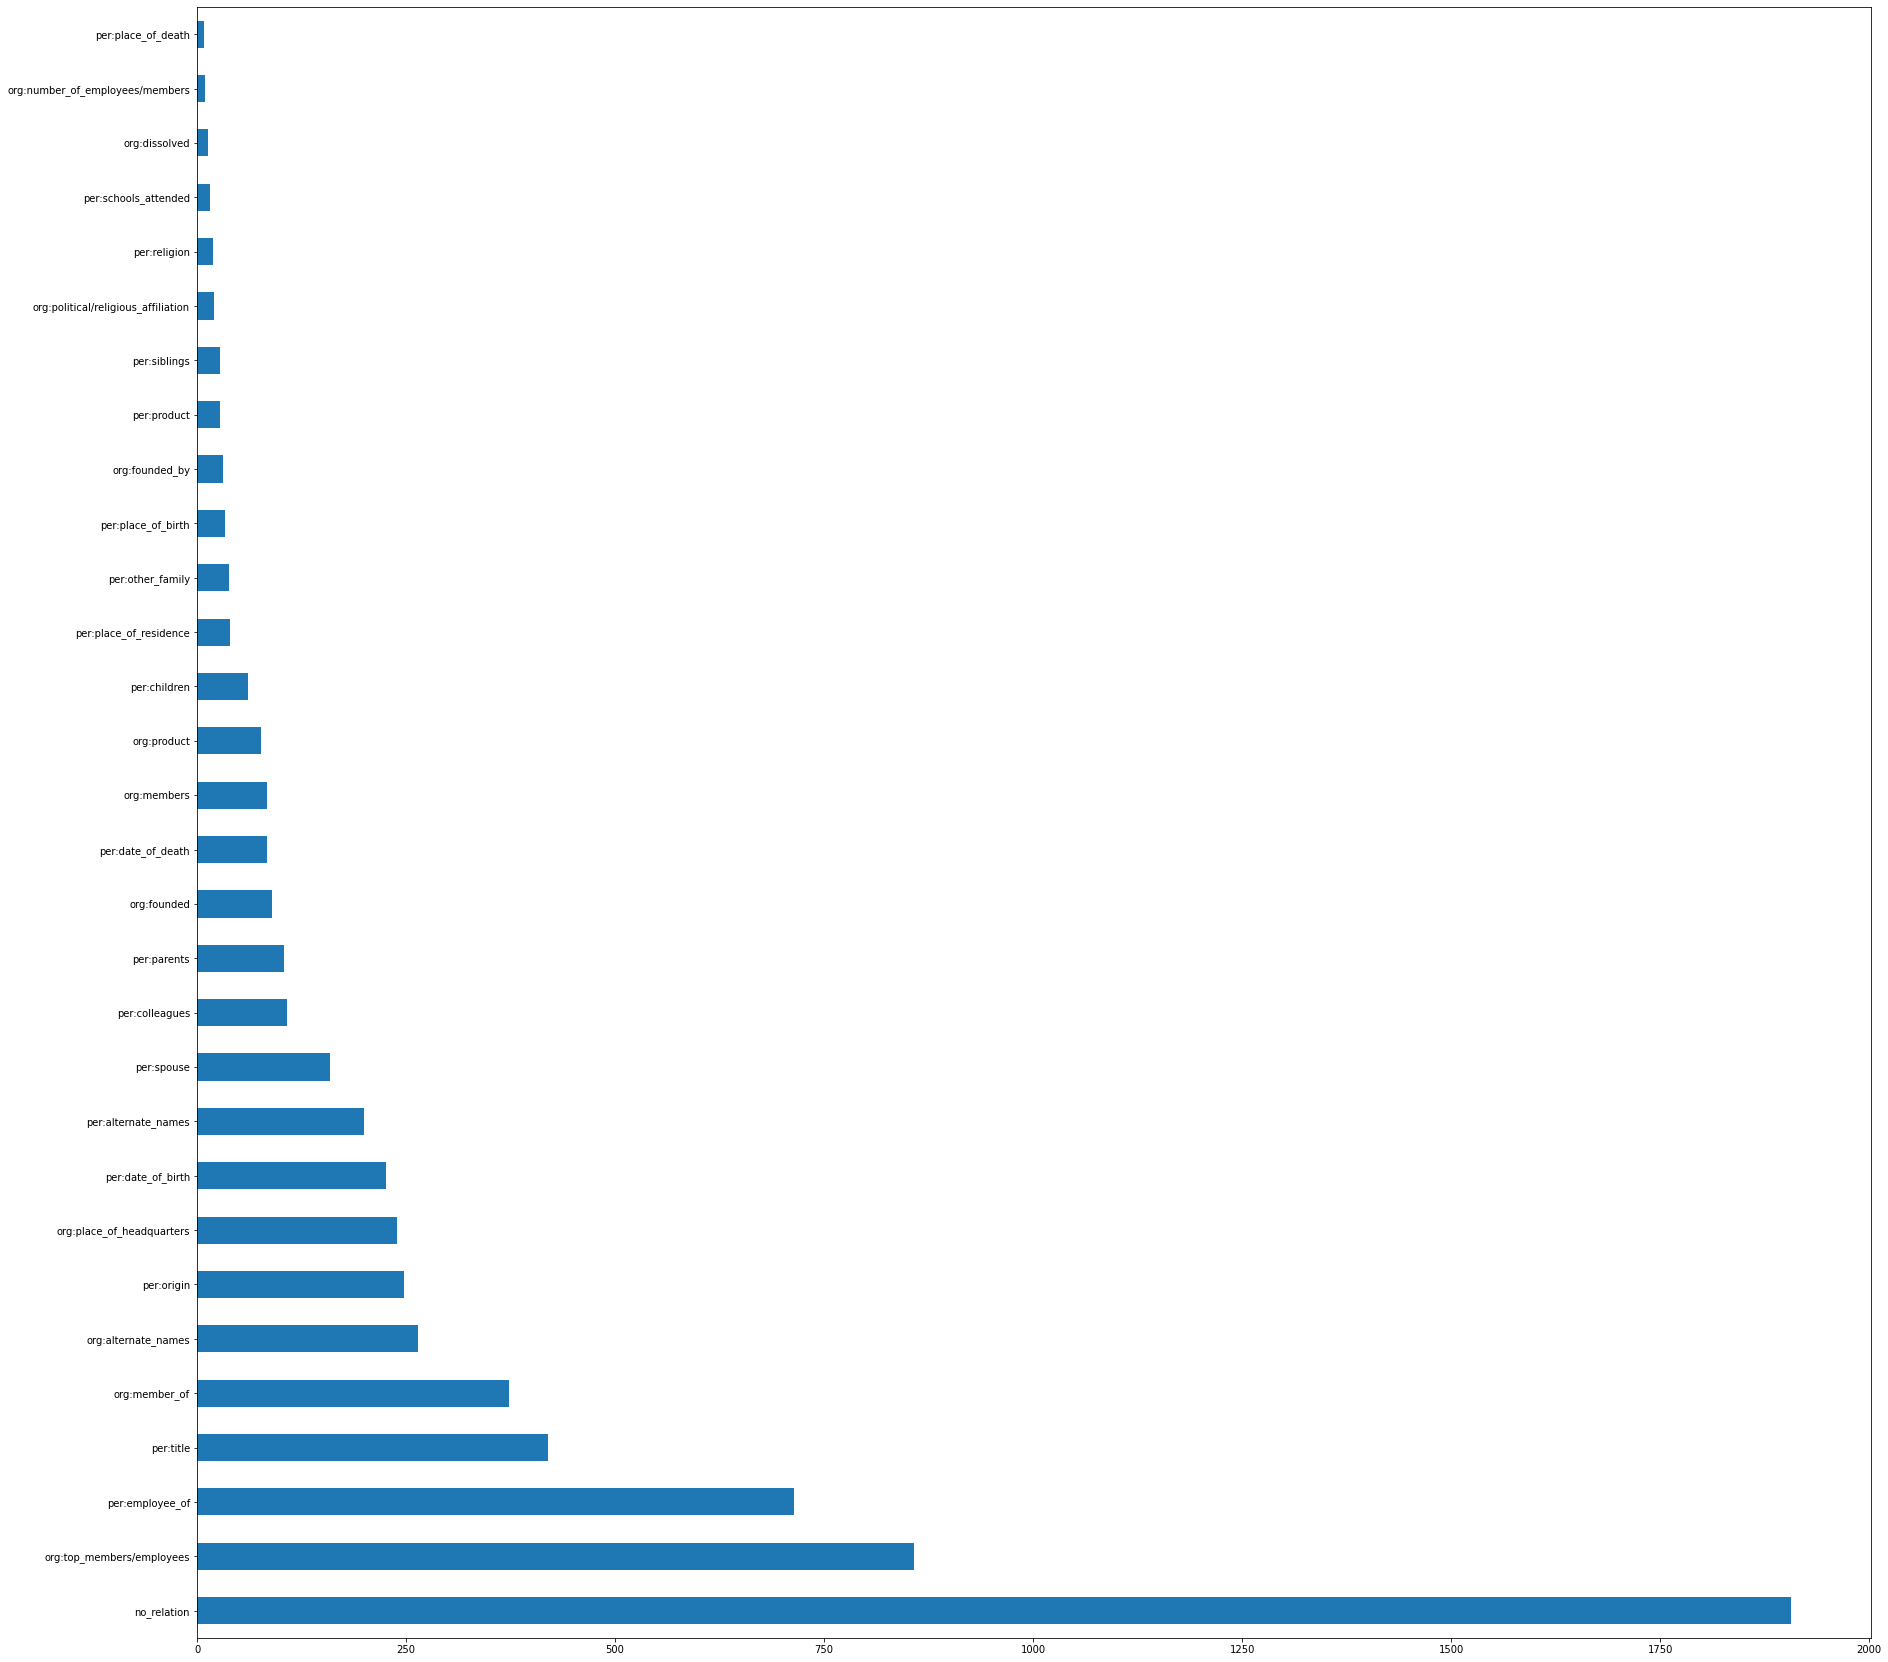

In [36]:
# 데이터 분석 (갯수, 비율)
# 필요한 부분만 주석 해제해서 사용해 주세요


print(">>> val 데이터 갯수")
print(val_inference_df['label'].value_counts())
val_inference_df['label'].value_counts().plot(kind='barh', figsize=(30,30))
plt.show()
print()


print(">>> 틀린 데이터 갯수")
print(wrong_df['label'].value_counts())
wrong_df['label'].value_counts().plot(kind='barh', figsize=(30,30))
plt.show()
print()


# print(">>> 틀린 데이터 비율")
# print(wrong_df['label'].value_counts(normalize=True))
# wrong_df['label'].value_counts(normalize=True).plot(kind='barh', figsize=(30,30))
# plt.show()
# print()


# print(">>> val 데이터 대비, 틀린 데이터 비율")
# ratio_list = []
# label = wrong_df['label'].unique()
# for i in range(len(label)):
#     count = len(wrong_df[wrong_df['label'] == label[i]]) / len(no_preprocess_train_df[no_preprocess_train_df['label'] == label[i]])
#     ratio_list.append(list(["{0:38}".format(label[i]), round(count,3)]))
# ratio_list = sorted(ratio_list, key=lambda x:x[1], reverse=True)
# for i in range(len(label)):
#     print(ratio_list[i][0],ratio_list[i][1])


>>> 예측한 per:place_of_residence 데이터 갯수
39

>>> 예측한 per:place_of_residence 중, 틀린 데이터
29
per:origin                   14
no_relation                   5
per:employee_of               4
per:place_of_birth            2
per:alternate_names           1
org:place_of_headquarters     1
org:member_of                 1
per:religion                  1
Name: pred_label, dtype: int64


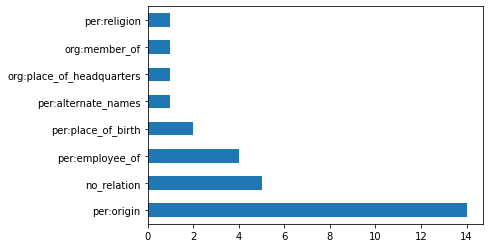


>>> 예측한 {selected_label} 중, 틀린 데이터 정보

---------------------------------------------------------------------------------

index >>>  26
2014년 2월 보홀의 르네 렐람파고스 하원의원이 제출한 또 다른 법안은 호세 리잘을 유일한 필리핀 국민 영웅으로 선언하는 것이었다.
[CLS] 2014년 2월 보홀의 르네 렐람파고스 하원의원이 제출한 또 다른 법안은 호세 리잘을 유일한 필리핀 국민 영웅으로 선언하는 것이었다. [SEP]
subject >>> {'word': '호세 리잘', 'start_idx': 41, 'end_idx': 45, 'type': 'PER'}
object >>> {'word': '필리핀', 'start_idx': 52, 'end_idx': 54, 'type': 'LOC'}
true_relation >>> per:place_of_residence
pred_relation >>> per:origin

---------------------------------------------------------------------------------

index >>>  146
누르술탄 나자르바예프가 독립 이후 카자흐스탄의 대통령으로 선출되었다.
[CLS] 누르술탄 나자르바예프가 독립 이후 카자흐스탄의 대통령으로 선출되었다. [SEP]
subject >>> {'word': '나자르바예프', 'start_idx': 5, 'end_idx': 10, 'type': 'PER'}
object >>> {'word': '카자흐스탄', 'start_idx': 19, 'end_idx': 23, 'type': 'LOC'}
true_relation >>> per:place_of_residence
pred_relation >>> org:member_of

----------------------------------------------------------------

In [34]:
label = val_inference_df['label']
pred_label = val_inference_df['pred_label']

# print(">>> label 정보")
# print(label.unique())
# print()

# 데이터 분석 (detail)
# 필요한 부분만 주석 해제해서 사용해 주세요
# selected_label -> 분석을 원하는 라벨로 변경해 주세요
selected_label = 'per:place_of_residence'

selected_df = val_inference_df[val_inference_df['label'] == selected_label]
selected_wrong_df = selected_df[selected_df['label'] != selected_df['pred_label']]

print(f">>> 예측한 {selected_label} 데이터 갯수")
print(len(selected_df['label']))
print()
print(f">>> 예측한 {selected_label} 중, 틀린 데이터")
print(len(selected_wrong_df))
print(selected_wrong_df['pred_label'].value_counts())
selected_wrong_df['pred_label'].value_counts().plot(kind='barh')
plt.show()
print()

print(">>> 예측한 {selected_label} 중, 틀린 데이터 정보")
print()
for i in selected_wrong_df.index:
    print("---------------------------------------------------------------------------------\n")
    print(f"index >>> ",i)
    print(f"{selected_wrong_df['sentence'][i]}")
    print(tokenizer.decode(tokenizer(selected_wrong_df['sentence'][i]).input_ids))
    print(f"subject >>> {no_preprocess_val_df['subject_entity'][i]}")
    print(f"object >>> {no_preprocess_val_df['object_entity'][i]}")
    print(f"true_relation >>> {selected_label}")
    print(f"pred_relation >>> {selected_wrong_df['pred_label'][i]}")
    print()
